In [1]:
import matplotlib.pyplot as plt
import matplotlib
from pylab import figure, text, scatter, show
import sys, math, numpy
import seaborn as sns
sns.set_theme()
sns.set_style(style='white')
sns.set_style("ticks")

In [2]:
def get_dist(sysname, distlabel):
    """Get the distances for a edge in sys."""
    _basedir = f"/scratch/users/zilins/6.proj_ges_imi/2.datasets/rawds"
    edge_label = numpy.load(f"{_basedir}/label_edges.npy")
    edge_dist  = numpy.load(f"{_basedir}/ges_imi.{sysname}.edge_dist.npy")
    i = numpy.where(distlabel==edge_label)
    dist = numpy.squeeze(edge_dist[:, i])
    return dist

def get_chrg(sysname, chrglabel):
    """Get the NBO charges for a edge in sys."""
    _basedir = f"/scratch/users/zilins/6.proj_ges_imi/2.datasets/rawds"
    node_labels = numpy.load(f"{_basedir}/label_nodes.npy")
    chrg_arrays = numpy.load(f"{_basedir}/ges_imi.{sysname}.node_nbo.npy")
    i = numpy.where(chrglabel==node_labels)
    chrg = numpy.squeeze(chrg_arrays[:, i])
    return chrg

def get_ener(sysname):
    """Get the energies for a sys."""
    _basedir = f"/scratch/users/zilins/6.proj_ges_imi/3.gnn/model_pred"
    ener = numpy.load(f"{_basedir}/{sysname}_pred.npy")
    return ener

def get_latent(sysname):
    """Get the latent representation for a sys."""
    _basedir = f"/scratch/users/zilins/6.proj_ges_imi/3.gnn/model_latent"
    latent = numpy.load(f"{_basedir}/{sysname}_latent.npy")
    return latent

In [3]:
edge_list = ["SER.64.OG:LYS.67.HZ1",     "GLU.161.OE1:TIP3.287.H1",  "IMI.286.C7:TIP3.287.OH2",
             "SER.64.OG:LYS.67.HZ3",     "ASN.127.OD1:LYS.67.HZ2",   "ASN.127.OD1:IMI.286.H15O", "GLU.161.OE1:LYS.67.HZ2", 
             "GLU.161.OE2:SER.165.HG1",  "GLU.161.OE1:IMI.286.H15O", "SER.165.OG:TIP3.287.H2",   "IMI.286.O15:LYS.67.HZ1",   
             "IMI.286.O15:ASN.127.HD22", "IMI.286.C7:IMI.286.O15",   "TIP3.287.OH2:LYS.67.HZ1",  "TIP3.287.OH2:IMI.286.H15O",
             "SER.64.OG:SER.64.HG1",     "IMI.286.O7:SER.64.HG1"
            ]
edge_label= [r"Ser70 O$\gamma$ - Lys73 H$\zeta$1",      r"Glu166 O$\epsilon$1 - Water H1",      "IMI C7 - Water O",
             r"Ser70 O$\gamma$ - Lys73 H$\zeta$3",      r"Asn132 O$\delta$ - Lys73 H$\zeta$2", r"Asn132 O$\delta$ - IMI HO15", r"Glu166 O$\epsilon$1 - Lys73 H$\zeta$2",
             r"Glu166 O$\epsilon$2 - Ser170 H$\gamma$", r"Glu166 O$\epsilon$1 - IMI HO15",     r"Ser170 O$\gamma$ - Water H2", r"IMI O15 - Lys73 H$\zeta$1",
             r"IMI O15 - Asn132 H$\delta$2",            r"IMI C7 - IMI O15",                   r"Water O - Lys73 H$\zeta$1",   r"Water O - IMI HO15",
             r"Ser70 O$\gamma$ - IMI H4",     "IMI O7 - IMI H4"
            ]


edge1 = numpy.asarray([get_dist('d1', el) for el in edge_list]).T[:, :15]
edge2 = numpy.asarray([get_dist('d2', el) for el in edge_list]).T

ener1 = get_ener('d1')
ener2 = get_ener('d2')

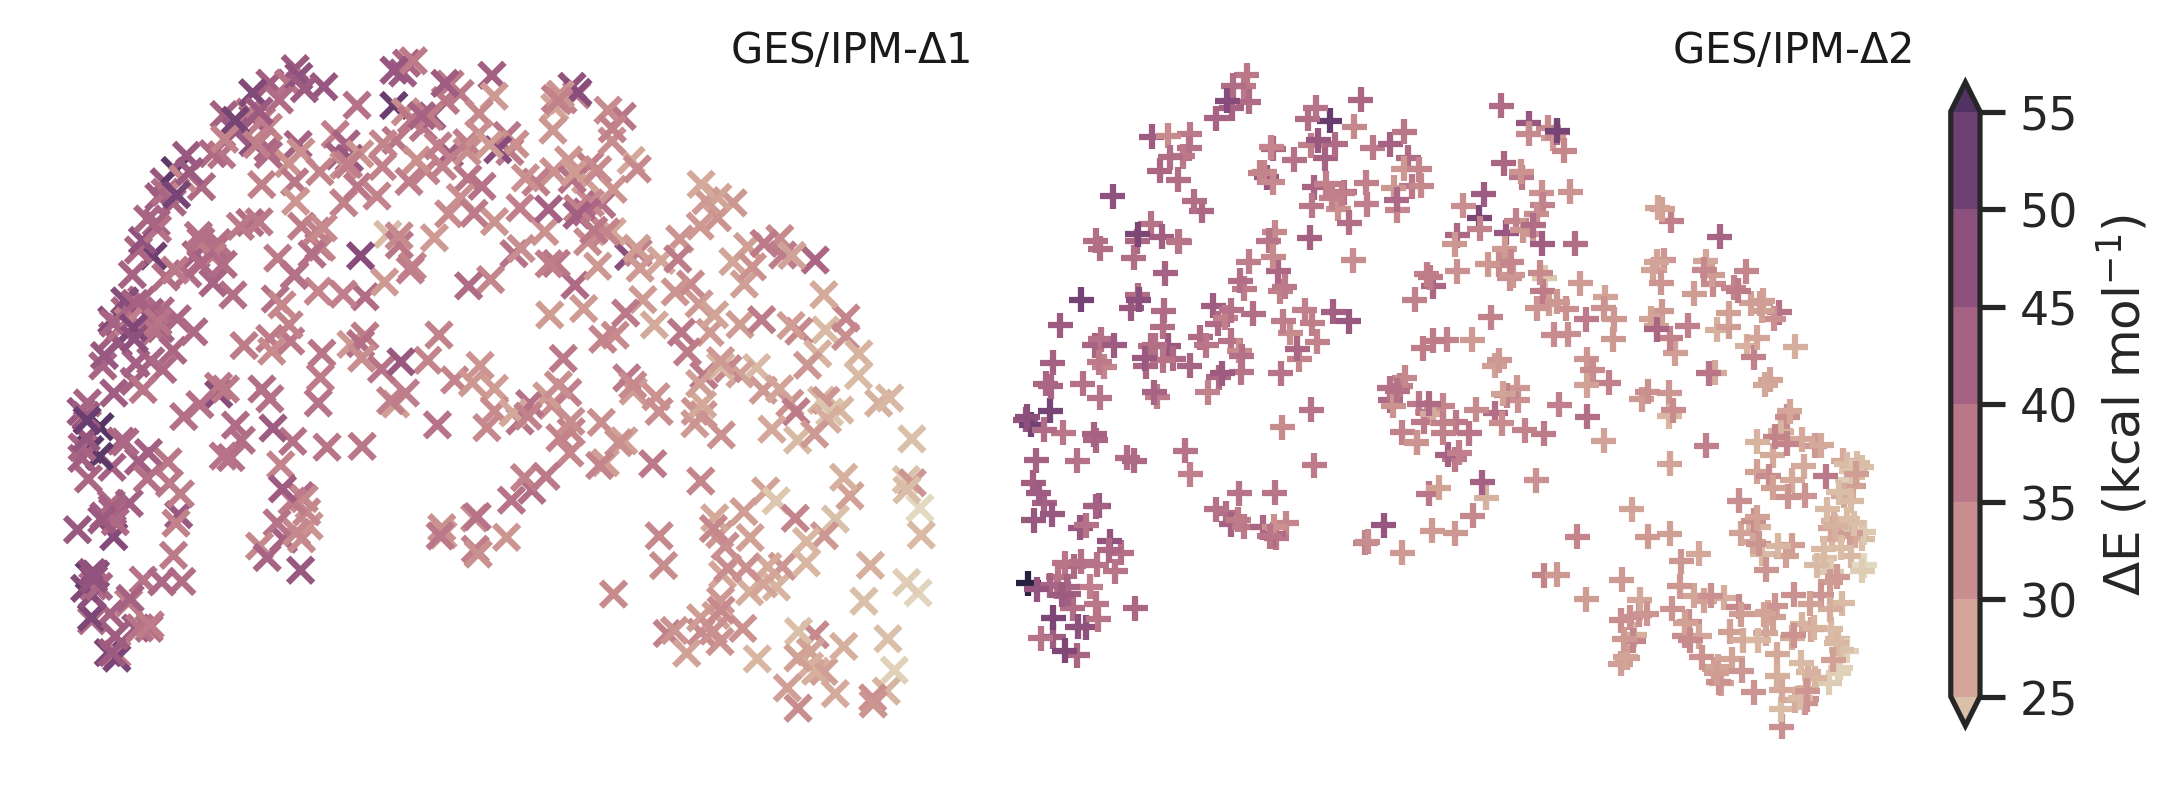

In [9]:

edge_dr = numpy.concatenate((edge1[:, :3], edge2[:, :3]), axis=0)

from umap import UMAP

embedding = UMAP(n_components=2, random_state=2, n_neighbors=999)
umap = embedding.fit_transform(edge_dr)

fig, axes = plt.subplots(figsize=(7.5, 3.5), nrows=1, ncols=2, dpi=300, sharex=True, sharey=True)
plt.subplots_adjust(left=.25/7.5, right=6.75/7.5, top=3./3.5, bottom=.5/3.5, wspace=.0, hspace=.0)

ax = axes[0]
ax.set_xlim(-3, 9.5)
ax.set_ylim( 9.5, 13.5)
ax.axis('off')

im = ax.scatter(x=umap[:500, 0], y=umap[:500, 1], c=ener1, marker='x', cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))
ax.text(1., 1., r'GES/IPM-$\Delta$1', ha='right', va='top', transform=ax.transAxes, fontsize=10, color='k')

ax = axes[1]
ax.set_xlim(-3, 9.5)
ax.set_ylim( 9.5, 13.5)
ax.axis('off')

im = ax.scatter(x=umap[500:, 0], y=umap[500:, 1], c=ener2, marker='+', cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))
ax.text(1., 1., r'GES/IPM-$\Delta$2', ha='right', va='top', transform=ax.transAxes, fontsize=10, color='k')

cbar = fig.colorbar(im, ax=axes.ravel().tolist(), boundaries=numpy.linspace(20,60,9), extend='both', fraction=0.015, pad=.02)
cbar.set_label(r'$\Delta$E (kcal mol$^{-1}$)')


plt.show()

fig.savefig(f'rc_umap.png')

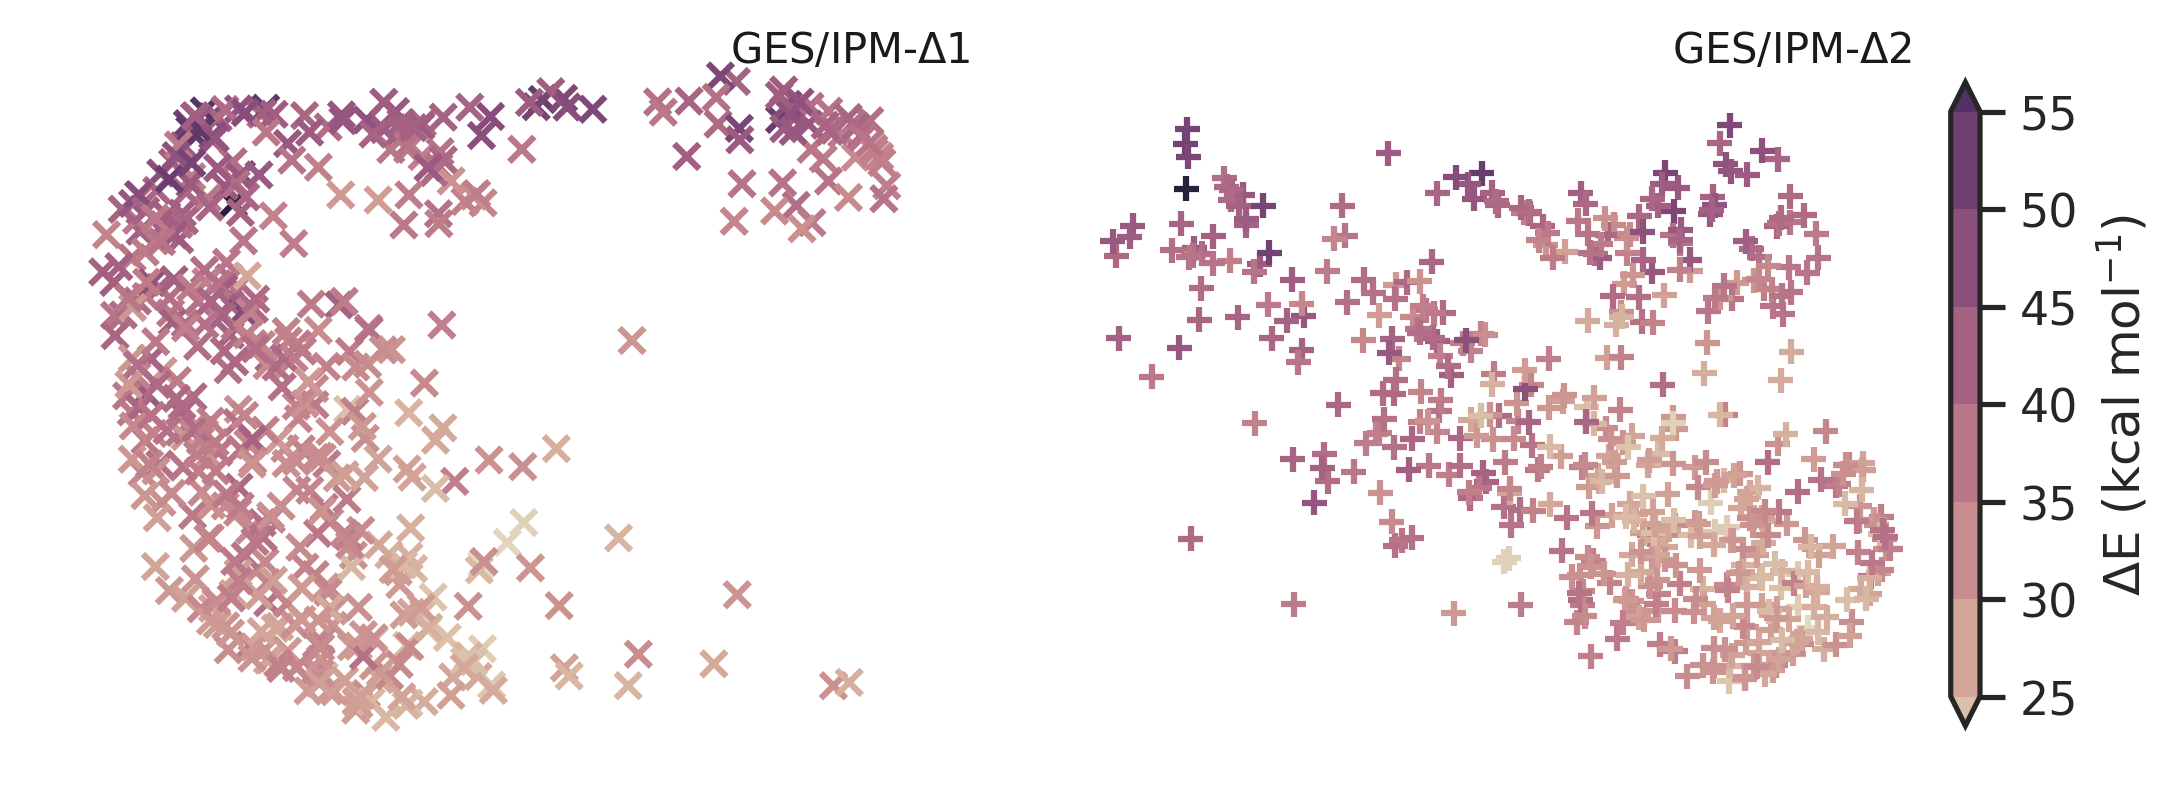

In [10]:
sns.set_style(style='white')
sns.set_style("ticks")

latent1_dr = get_latent('d1')
latent2_dr = get_latent('d2')
latent_dr  = numpy.concatenate((latent1_dr, latent2_dr), axis=0)

embedding = UMAP(n_components=2, random_state=2, n_neighbors=999)
pc = embedding.fit_transform(latent_dr)
pc1, pc2 = pc[:, 0], pc[:, 1]

fig, axes = plt.subplots(figsize=(7.5, 3.5), nrows=1, ncols=2, dpi=300, sharex=True, sharey=True)
plt.subplots_adjust(left=.25/7.5, right=6.75/7.5, top=3./3.5, bottom=.5/3.5, wspace=.0, hspace=.0)

ax = axes[0]
ax.set_xlim(-4.5,1.5)
ax.set_ylim(-35, -29)
ax.axis('off')

im = ax.scatter(x=pc1[:500], y=pc2[:500], c=ener1, marker='x', cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))
ax.text(1., 1., r'GES/IPM-$\Delta$1', ha='right', va='top', transform=ax.transAxes, fontsize=10, color='k')

ax = axes[1]
ax.set_xlim(-4.5,1.5)
ax.set_ylim(-35, -29)
ax.axis('off')

im = ax.scatter(x=pc1[500:], y=pc2[500:], c=ener2, marker='+', cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))
ax.text(1., 1., r'GES/IPM-$\Delta$2', ha='right', va='top', transform=ax.transAxes, fontsize=10, color='k')


cbar = fig.colorbar(im, ax=axes.ravel().tolist(), boundaries=numpy.linspace(20,60,9), extend='both', fraction=0.015, pad=.02)
cbar.set_label(r'$\Delta$E (kcal mol$^{-1}$)')


plt.show()

fig.savefig(f'latent_umap.png')